In [1]:
from multiprocessing.dummy import Pool
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import requests
import pyprind
import time

n = 50


def test():
    html = requests.get('https://de.wikipedia.org/wiki/Spezial:Zuf%C3%A4llige_Seite').text
    bs = BeautifulSoup(html, 'lxml')
    return bs.find('title').get_text()


data = []
bar = pyprind.ProgPercent(n-1)
for i in range(1, n):
    start_1 = time.time()
    pool = Pool(i)
    futures = []
    for x in range(i):
        futures.append(pool.apply_async(test))
    for titel in futures:
        _ = titel.get()
    ende_1 = time.time()
    
    start_2 = time.time()
    for _ in range(i):
        html = requests.get('https://de.wikipedia.org/wiki/Spezial:Zuf%C3%A4llige_Seite').text
        bs = BeautifulSoup(html, 'lxml')
        _ = bs.find('title').get_text()
    ende_2 = time.time()
    
    data.append([ende_1-start_1, ende_2-start_2, i])
    bar.update()

df = pd.DataFrame(data, columns=['Dauer_Parallel', 'Dauer_Sequence', 'Prozesse'])
df.head()

[100 %] Time elapsed: 00:15:10 | ETA: 00:00:00
Total time elapsed: 00:15:10


,Dauer_Parallel,Dauer_Sequence,Prozesse
0,0.631572,0.344628,1
1,0.679851,0.756277,2
2,0.689812,1.096702,3
3,0.994100,1.808328,4
4,1.009354,1.916567,5


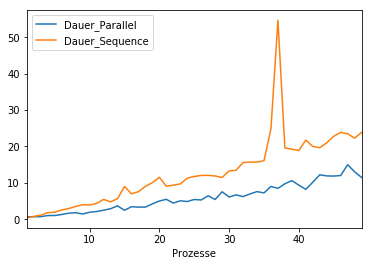

In [2]:
df.plot(x='Prozesse', y=['Dauer_Parallel', 'Dauer_Sequence'])
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lr_p = LinearRegression()
lr_p.fit(df['Prozesse'].values.reshape(-1, 1), df['Dauer_Parallel'])
print('Parallel\tm*x + b:\t{:.3f}*x + {:.3f}'.format(lr_p.coef_[0], lr_p.intercept_))

lr_s = LinearRegression()
lr_s.fit(df['Prozesse'].values.reshape(-1, 1), df['Dauer_Sequence'])
print('Sequence\tm*x + b:\t{:.3f}*x + {:.3f}'.format(lr_s.coef_[0], lr_s.intercept_))

Parallel	m*x + b:	0.262*x + -0.672
Sequence	m*x + b:	0.550*x + -1.075


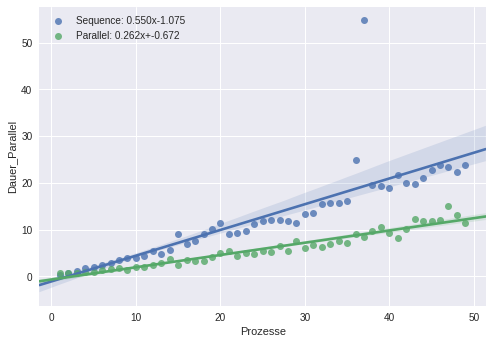

In [5]:
import seaborn as sns
sns.regplot(x="Prozesse", y="Dauer_Sequence", data=df, label='Sequence: {:.3f}x{:.3f}'.format(lr_s.coef_[0], lr_s.intercept_))
sns.regplot(x="Prozesse", y="Dauer_Parallel", data=df, label='Parallel: {:.3f}x+{:.3f}'.format(lr_p.coef_[0], lr_p.intercept_))
plt.legend()
plt.show()